# Part 1: Data Preprocessing 

## Importing libraries and Dataset

In [73]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset link : https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

In [74]:
dataset = pd.read_csv("Churn_Modelling.csv")

## Data Exploration

In [75]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
dataset.shape

(10000, 14)

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [78]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [79]:
dataset.select_dtypes("object").columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [80]:
len(dataset.select_dtypes("object").columns)

3

In [81]:
dataset.select_dtypes(["int64","float64"]).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [82]:
len(dataset.select_dtypes(["int64","float64"]).columns)

11

### Statistical Summary

In [83]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Encoding Categorical Data

In [84]:
dataset.select_dtypes("object").columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [85]:
dataset.drop(columns=["Surname", "RowNumber", "CustomerId"], inplace=True)


In [86]:
dataset.select_dtypes("object").columns

Index(['Geography', 'Gender'], dtype='object')

In [87]:
dataset["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [88]:
dataset["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [89]:
numeric_columns = dataset.select_dtypes(include='number')
numeric_columns.groupby(dataset["Geography"]).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [90]:
numeric_columns.groupby(dataset["Gender"]).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [91]:
## ONE HOT ENCODING
dataset= pd.get_dummies(data=dataset,drop_first=True,dtype="int")

In [92]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Countplot

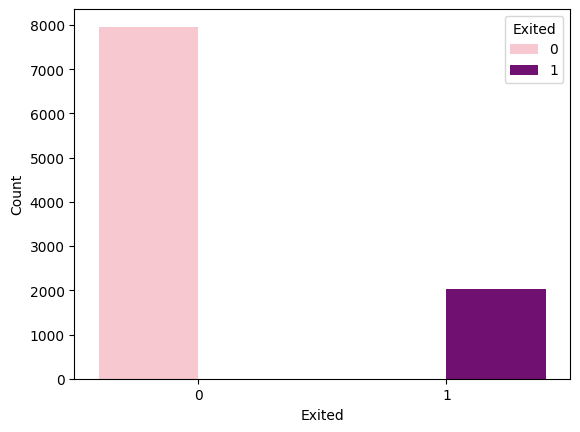

In [93]:
sns.countplot(data=dataset, x='Exited', hue='Exited', palette={1: 'purple', 0: 'pink'})
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

In [94]:
# Staying with the bank
(dataset.Exited==0).sum()

7963

In [95]:
#Left the bank
(dataset.Exited==1).sum()

2037

## Correlation matrix and Heat Map

In [96]:
dataset_2 =dataset.drop(columns="Exited")

<Axes: title={'center': 'correlated with exited'}>

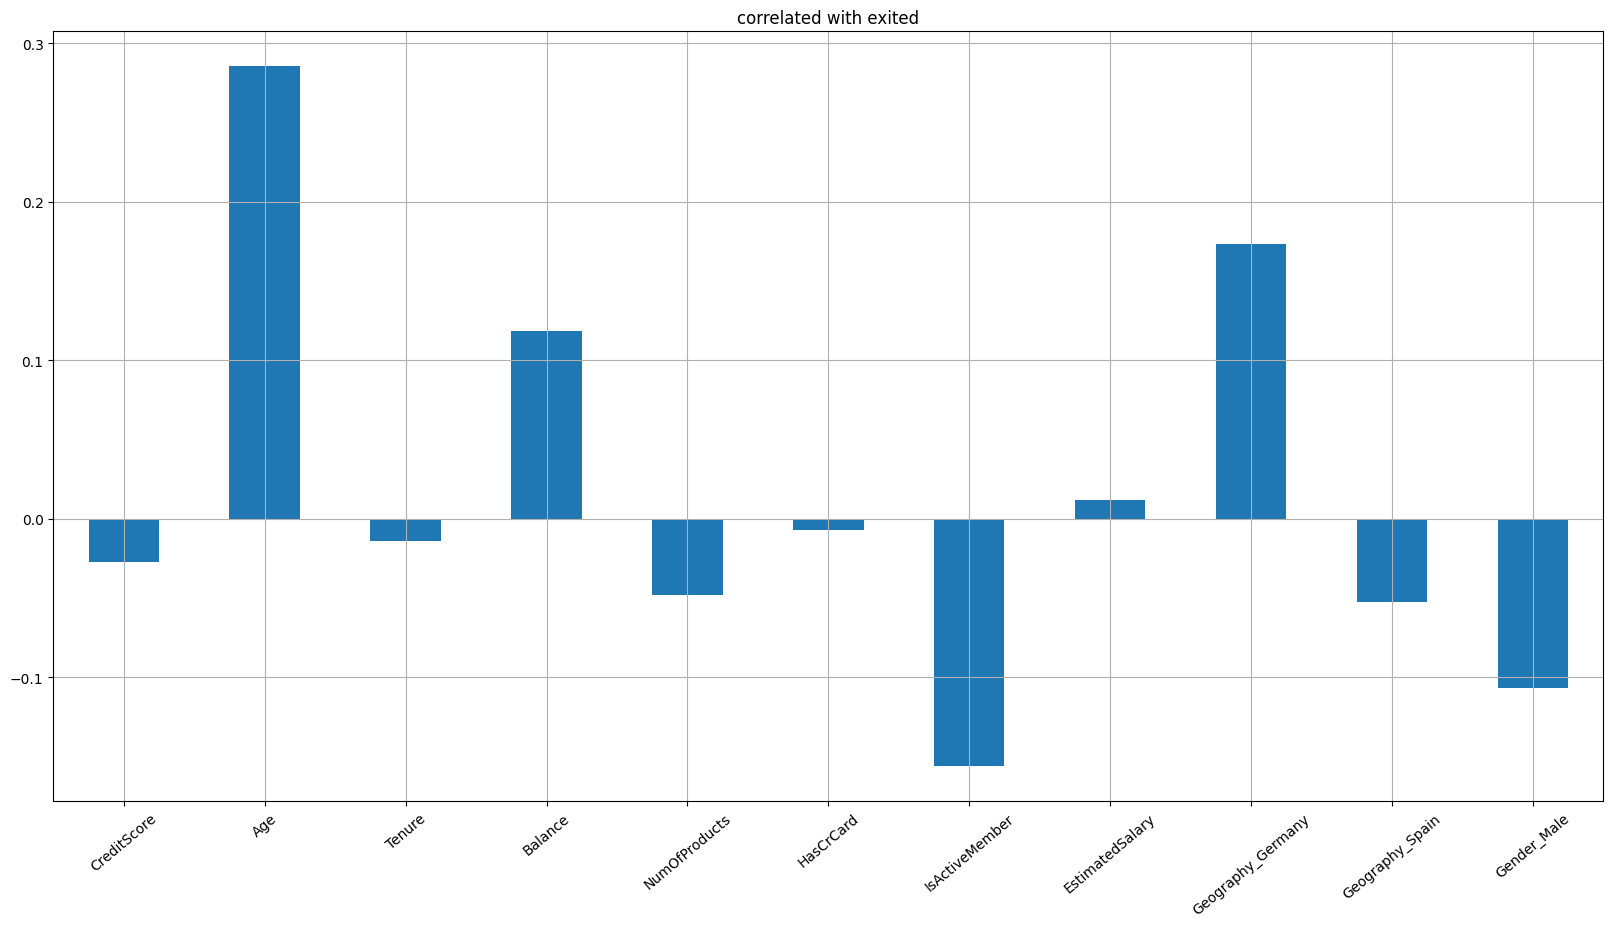

In [97]:
dataset_2.corrwith(dataset["Exited"]).plot.bar(
    figsize =(20,10),title= "correlated with exited",rot=40,grid=True
)

In [98]:
corr = dataset.corr()

<Axes: >

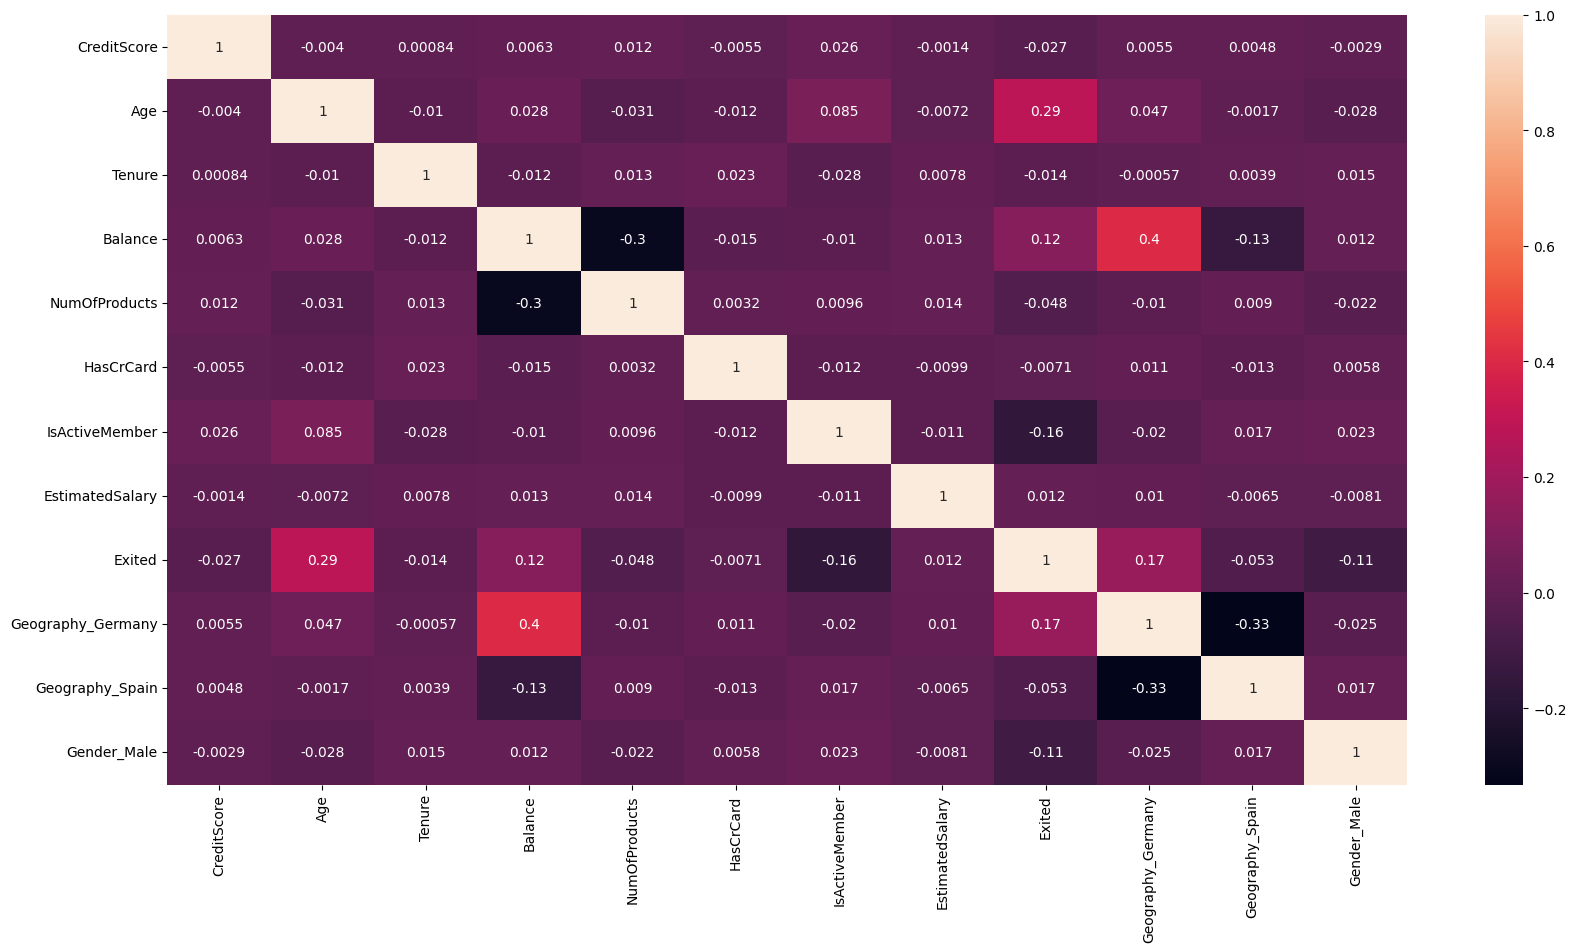

In [99]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

## Splitting the dataset

In [100]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [101]:
# Matrix of Features // Independent Variables
x = dataset.drop(columns="Exited")

In [102]:
# target / dependent variables
y = dataset["Exited"]

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)


In [104]:
x_train.shape

(8000, 11)

In [105]:
x_test.shape

(2000, 11)

In [106]:
y_train.shape

(8000,)

In [107]:
y_test.shape

(2000,)

## Feature Scaling

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [109]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [110]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

# Part 2 : Building the Model

## 1) Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [112]:
y_pred = classifier_lr.predict(x_test)

In [113]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [114]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)

In [115]:
results_list = []
model_results = pd.DataFrame([['Logistic Regression', acc, ps, rs, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_list.append(model_results)
results = pd.concat(results_list, ignore_index=True)


In [116]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.811,0.581818,0.237037,0.336842


In [117]:
confusion_matrix(y_test,y_pred)

array([[1526,   69],
       [ 309,   96]])

### Cross-validation

In [118]:
from sklearn.model_selection import cross_val_score
accracies = cross_val_score(estimator=classifier_lr,X=x_train,y=y_train,cv=10)

print("Accuracy is {:.2f} %".format(accracies.mean()*100))
print("Standard deviation is {:.2f} %".format(accracies.std()*100))

Accuracy is 80.84 %
Standard deviation is 0.88 %


## 2) Random Forest 

In [119]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [120]:
y_pred = classifier_rf.predict(x_test)

In [121]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [122]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)

In [123]:

model_results = pd.DataFrame([['Random Forest', acc, ps, rs, f1]],
                columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Append model_results to the list
results_list.append(model_results)

# Convert the list of DataFrames to a single DataFrame
results = pd.concat(results_list, ignore_index=True)




In [124]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.811,0.581818,0.237037,0.336842
1,Random Forest,0.867,0.745583,0.520988,0.613372


In [125]:
confusion_matrix(y_test,y_pred)

array([[1523,   72],
       [ 194,  211]])

### Cross Validation

In [126]:
from sklearn.model_selection import cross_val_score
accracies = cross_val_score(estimator=classifier_rf,X=x_train,y=y_train,cv=10)

print("Accuracy is {:.2f} %".format(accracies.mean()*100))
print("Standard deviation is {:.2f} %".format(accracies.std()*100))

Accuracy is 85.96 %
Standard deviation is 1.02 %


## XGBoost

In [127]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [128]:
y_pred = classifier_xgb.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['XGB Classifier', acc, ps, rs, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_list.append(model_results)
results = pd.concat(results_list, ignore_index=True)

In [130]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8110,0.581818,0.237037,0.336842
1,Random Forest,0.8670,0.745583,0.520988,0.613372
2,XGB Classifier,0.8525,0.670807,0.533333,0.594223


In [131]:
confusion_matrix(y_test,y_pred)

array([[1489,  106],
       [ 189,  216]])

### Cross Validation

In [132]:
from sklearn.model_selection import cross_val_score
accracies = cross_val_score(estimator=classifier_xgb,X=x_train,y=y_train,cv=10)

print("Accuracy is {:.2f} %".format(accracies.mean()*100))
print("Standard deviation is {:.2f} %".format(accracies.std()*100))

Accuracy is 85.12 %
Standard deviation is 1.00 %


# Randomized Search to find best parameters

In [133]:
from sklearn.model_selection import RandomizedSearchCV

In [134]:
parameter = {
    "learning_rate":[0.05,.1,.15,.2,.25,.3],
    "max_depth":[3,4,5,6,7,8,10,12,15],
    "in_child_weight":[1,3,5,7],
    "gamma":[0.1,.2,.3,.4],
    "colsample_bytree":[.3,.4,.5,.7]
}

In [135]:
parameter

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
 'in_child_weight': [1, 3, 5, 7],
 'gamma': [0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [136]:
randomized_search = RandomizedSearchCV(estimator=classifier_xgb,param_distributions=parameter,n_iter=5,
                                       n_jobs=-1,scoring="roc_auc",cv=5,verbose=3)

In [137]:
randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, in_child_weight=5, learning_rate=0.3, max_depth=7;, score=0.859 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, in_child_weight=5, learning_rate=0.3, max_depth=7;, score=0.840 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, in_child_weight=5, learning_rate=0.3, max_depth=7;, score=0.840 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, in_child_weight=5, learning_rate=0.3, max_depth=7;, score=0.831 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, in_child_weight=5, learning_rate=0.3, max_depth=7;, score=0.850 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:25:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:25:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:25:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:25:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learn

[CV 2/5] END colsample_bytree=0.5, gamma=0.4, in_child_weight=3, learning_rate=0.25, max_depth=15;, score=0.841 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, in_child_weight=3, learning_rate=0.25, max_depth=15;, score=0.851 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, in_child_weight=7, learning_rate=0.2, max_depth=15;, score=0.835 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, in_child_weight=3, learning_rate=0.25, max_depth=15;, score=0.836 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, in_child_weight=7, learning_rate=0.2, max_depth=15;, score=0.847 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, in_child_weight=7, learning_rate=0.2, max_depth=15;, score=0.840 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, in_child_weight=7, learning_rate=0.2, max_depth=15;, score=0.837 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, in_child_weight=7, learning_rate=0.2, max

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:25:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:25:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:25:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:25:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learn

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, in_child_weight=5, learning_rate=0.1, max_depth=12;, score=0.858 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, in_child_weight=5, learning_rate=0.1, max_depth=12;, score=0.853 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, in_child_weight=5, learning_rate=0.1, max_depth=12;, score=0.844 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, in_child_weight=5, learning_rate=0.1, max_depth=12;, score=0.839 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, in_child_weight=5, learning_rate=0.1, max_depth=12;, score=0.844 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, in_child_weight=7, learning_rate=0.25, max_depth=15;, score=0.839 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, in_child_weight=7, learning_rate=0.25, max_depth=15;, score=0.828 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, in_child_weight=7, learning_rate=0.25, max

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:25:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:25:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:25:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "in_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.1, 0.2, 0.3, 0.4],
                                        'in_child_weight': [1, 3, 5, 7],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15]},
                   scoring='roc_auc', verbose=3)

In [138]:
randomized_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              in_child_weight=5, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [139]:
randomized_search.best_params_

{'max_depth': 12,
 'learning_rate': 0.1,
 'in_child_weight': 5,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [140]:
randomized_search.best_score_

0.84747244283313

# Part 4 : Final Model (XGBOOST Classifier)

In [141]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              in_child_weight=5, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None)
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              in_child_weight=5, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [142]:
y_pred = classifier.predict(x_test)

In [143]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['Final XGB ', acc, ps, rs, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_list.append(model_results)
results = pd.concat(results_list, ignore_index=True)

In [144]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8110,0.581818,0.237037,0.336842
1,Random Forest,0.8670,0.745583,0.520988,0.613372
2,XGB Classifier,0.8525,0.670807,0.533333,0.594223
3,Final XGB,0.8675,0.777778,0.483951,0.596651


In [147]:
confusion_matrix(y_test,y_pred)

array([[1539,   56],
       [ 209,  196]])

## Cross Validation

In [148]:
from sklearn.model_selection import cross_val_score
accracies = cross_val_score(estimator=classifier_rf,X=x_train,y=y_train,cv=10)

print("Accuracy is {:.2f} %".format(accracies.mean()*100))
print("Standard deviation is {:.2f} %".format(accracies.std()*100))

Accuracy is 85.96 %
Standard deviation is 1.02 %


# Part 5: Making a single Prediction

In [149]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [150]:
single_observation=[[625,45,5,12500.01,1,0,1,101348.88,0,0,1]]

In [151]:
single_observation

[[625, 45, 5, 12500.01, 1, 0, 1, 101348.88, 0, 0, 1]]

In [152]:
classifier.predict(sc.transform(single_observation))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])